## NLP PROJECT
### Quora Question Pair Similarity +MLPO’s

## Project of the Gist
> The name of the project is Quora Question Pair Similarity, We are given data[Text] from the quora website basically similarly worded questions(Different variations of the same question), Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. This causes active seekers difficulty in finding the best possible answer to their question and also makes writers feel they need to answer multiple versions of the same question. The main aim of the project is to predict whether a pair of questions is similar or not. This project is an NLP project because we are dealing with text data.

## Problem Statement:
> Identify which questions asked on Quora are duplicates of questions that have already been asked.

### Domain
> Social networking 

## Real World/Business Objectives and Constraints:
+ The cost of a mis-classification can be very high.
+ We would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
+ No strict latency concerns.
+ Interpretability is partially important.

## Import required libraries

In [6]:
import pandas as pd
import numpy as np

import re
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from pickle import dump
from pickle import load


sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

[nltk_data] Downloading package stopwords to C:\Users\GUDLA
[nltk_data]     RAGUWING\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to C:\Users\GUDLA
[nltk_data]     RAGUWING\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to C:\Users\GUDLA
[nltk_data]     RAGUWING\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
import zipfile # Unzipping the file
with zipfile.ZipFile(r"D:\Deep_learning\train.csv (1).zip", 'r') as zip_folder:
    zip_folder.extractall(r"D:\Deep_learning\train_unzipped")

In [29]:
nlp_df = pd.read_csv(r"D:\Deep_learning\train_unzipped\Dataset.csv") # Load the data

In [30]:
nlp_df = nlp_df[['id','qid1','question1','qid2','question2','is_duplicate']] # Rearrange the columns

In [31]:
nlp_df.head()

id  qid1                                          question1  qid2  \
0   0     1  What is the step by step guide to invest in sh...     2   
1   1     3  What is the story of Kohinoor (Koh-i-Noor) Dia...     4   
2   2     5  How can I increase the speed of my internet co...     6   
3   3     7  Why am I mentally very lonely? How can I solve...     8   
4   4     9  Which one dissolve in water quikly sugar, salt...    10   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [32]:
l = []
for i in nlp_df['is_duplicate']:
    if i == 0:
        l.append('Not Similar')
    else:
        l.append('Similar')

In [33]:
nlp_df['Question_similarity'] = l # adding a new feature for better understanding of target label

In [34]:
nlp_df.head()

id  qid1                                          question1  qid2  \
0   0     1  What is the step by step guide to invest in sh...     2   
1   1     3  What is the story of Kohinoor (Koh-i-Noor) Dia...     4   
2   2     5  How can I increase the speed of my internet co...     6   
3   3     7  Why am I mentally very lonely? How can I solve...     8   
4   4     9  Which one dissolve in water quikly sugar, salt...    10   

                                           question2  is_duplicate  \
0  What is the step by step guide to invest in sh...             0   
1  What would happen if the Indian government sto...             0   
2  How can Internet speed be increased by hacking...             0   
3  Find the remainder when [math]23^{24}[/math] i...             0   
4            Which fish would survive in salt water?             0   

  Question_similarity  
0         Not Similar  
1         Not Similar  
2         Not Similar  
3         Not Similar  
4         Not Similar

# EDA - Exploratory Data Analysis

In [35]:
nlp_df.duplicated().value_counts() # No Duplicates in our dataset

False    404290
dtype: int64

In [36]:
nlp_df.isna().sum() 

id                     0
qid1                   0
question1              1
qid2                   0
question2              2
is_duplicate           0
Question_similarity    0
dtype: int64

### Intution:
* Question one is having one missing value and question two is having 2 missing values, lets fill those questions with mode.

In [37]:
nlp_df[nlp_df.question1.isna()] # Viewing the missing values
nlp_df[nlp_df.question2.isna()] 

id    qid1 question1    qid2  \
363362  363362  493340       NaN  493341   

                                                question2  is_duplicate  \
363362  My Chinese name is Haichao Yu. What English na...             0   

       Question_similarity  
363362         Not Similar

id    qid1                         question1    qid2 question2  \
105780  105780  174363    How can I develop android app?  174364       NaN   
201841  201841  303951  How can I create an Android app?  174364       NaN   

        is_duplicate Question_similarity  
105780             0         Not Similar  
201841             0         Not Similar

In [38]:
str1 = 'How can I create an Android app?'

In [39]:
nlp_df.fillna(str1,axis = 0, inplace = True)

In [40]:
nlp_df.is_duplicate.loc[105780] = 1
nlp_df.is_duplicate.loc[201841] = 1
nlp_df.Question_similarity.loc[105780] = 'Similar'
nlp_df.Question_similarity.loc[201841] = 'Similar'

In [41]:
nlp_df[nlp_df.question2.isna()]

Empty DataFrame
Columns: [id, qid1, question1, qid2, question2, is_duplicate, Question_similarity]
Index: []

In [42]:
nlp_df.loc[105780]
nlp_df.loc[201841]
nlp_df.loc[363362]

id                                               105780
qid1                                             174363
question1                How can I develop android app?
qid2                                             174364
question2              How can I create an Android app?
is_duplicate                                          1
Question_similarity                             Similar
Name: 105780, dtype: object

id                                               201841
qid1                                             303951
question1              How can I create an Android app?
qid2                                             174364
question2              How can I create an Android app?
is_duplicate                                          1
Question_similarity                             Similar
Name: 201841, dtype: object

id                                                                363362
qid1                                                              493340
question1                               How can I create an Android app?
qid2                                                              493341
question2              My Chinese name is Haichao Yu. What English na...
is_duplicate                                                           0
Question_similarity                                          Not Similar
Name: 363362, dtype: object

In [43]:
nlp_df.isna().sum() # Done with missing values

id                     0
qid1                   0
question1              0
qid2                   0
question2              0
is_duplicate           0
Question_similarity    0
dtype: int64

In [44]:
nlp_df.head()

id  qid1                                          question1  qid2  \
0   0     1  What is the step by step guide to invest in sh...     2   
1   1     3  What is the story of Kohinoor (Koh-i-Noor) Dia...     4   
2   2     5  How can I increase the speed of my internet co...     6   
3   3     7  Why am I mentally very lonely? How can I solve...     8   
4   4     9  Which one dissolve in water quikly sugar, salt...    10   

                                           question2  is_duplicate  \
0  What is the step by step guide to invest in sh...             0   
1  What would happen if the Indian government sto...             0   
2  How can Internet speed be increased by hacking...             0   
3  Find the remainder when [math]23^{24}[/math] i...             0   
4            Which fish would survive in salt water?             0   

  Question_similarity  
0         Not Similar  
1         Not Similar  
2         Not Similar  
3         Not Similar  
4         Not Similar

## VIZ  - Lets check if there is any imbalance in our data

In [45]:
nlp_df.is_duplicate.value_counts(normalize=True)

0    0.630797
1    0.369203
Name: is_duplicate, dtype: float64

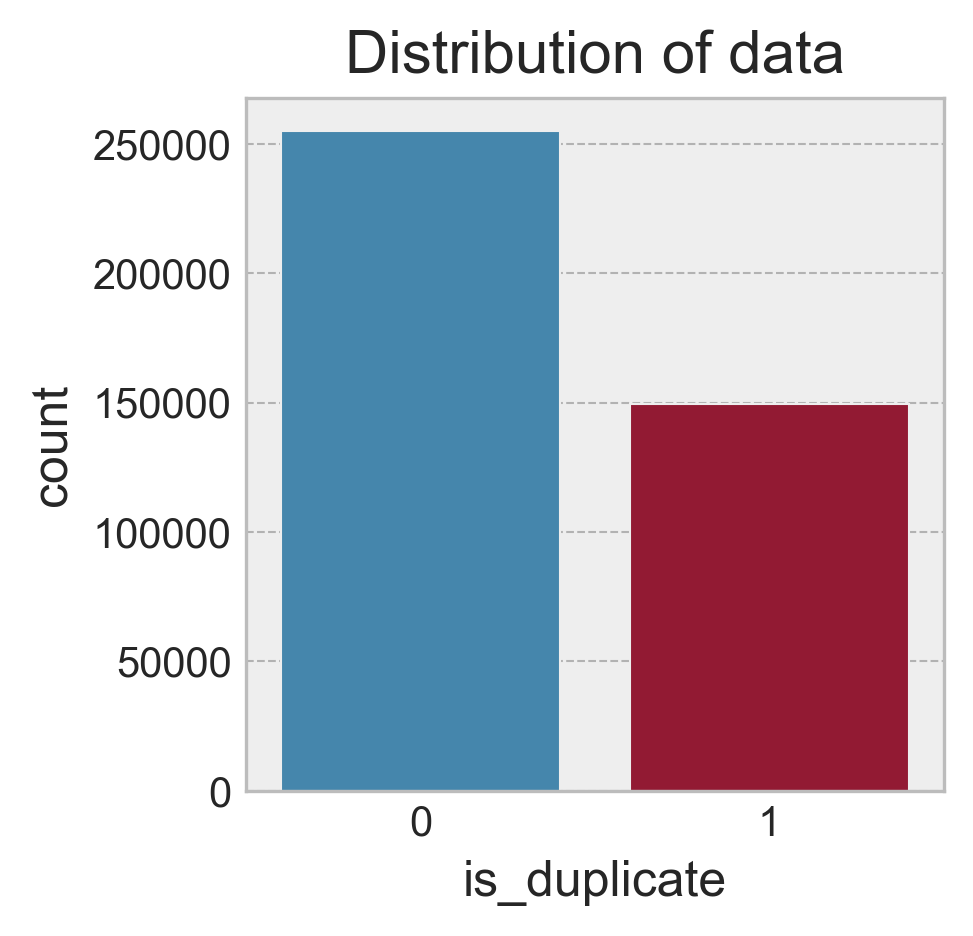

In [46]:
plt.figure(figsize=(3,3),dpi = 150)
plt.title('Distribution of data')
sns.countplot(x='is_duplicate', data=nlp_df);

## Intution:
* Clearly we can observe that there is an imbalance in our data.
* 63% of our data is non-similar data and 36% is similar data
* This is not a huge imbalance , still can have a major impact on our model's performance 

In [47]:
#Number of Unique Questions

qids = pd.Series(nlp_df['qid1'].tolist() + nlp_df['qid2'].tolist())
unique_qids = len(np.unique(qids))
qs_greaterthan1 = np.sum(qids.value_counts() > 1) # Questions greater than 1

print ('Total number of  Unique Questions are: {}\n'.format(unique_qids)) 

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_greaterthan1,qs_greaterthan1/unique_qids*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



In [48]:
nlp_df.to_csv('cleaned_df.csv') # Saving the cleaned file to csv format 

In [151]:
df_cleaned = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\Internship_Project\cleaned_df.csv") 
# Loading the cleaned file

In [152]:
y = df_cleaned['is_duplicate'] # Seggregating the data to input and output
X = df_cleaned[['question1','question2']]

In [153]:
from sklearn.model_selection import train_test_split # Test - Train 
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating Word Cloud 
* WordCloud is a visualization tool, provides an excellent option to analyze the text data through VIZ in the form of  tags or words. where the importance of a word is explained by its frequency.
> **Lets create a word cloud to visualize the train data in a much more understanding way**

In [52]:
X_train.head()
X_test.head()
X_train.shape
X_test.shape
y_train.shape
y_test.shape

question1  \
20128   How is the working environment at SBI Life, Mu...   
296237               How can a US citizen work in Canada?   
107095  What are the benefits of washing your hands wi...   
27940   How do the holy scriptures of Hinduism compare...   
251434  Is the humanoid shape inevitable for any speci...   

                                                question2  
20128                 How stressful is work of SBI clerk?  
296237  Will a US graduate degree help a non-US citize...  
107095  Why is it important to wash your hands with soap?  
27940   How do the holy scriptures of Hinduism compare...  
251434  Once RNA evolves is it inevitable that eventua...

question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   
73186              How close we are to see 3rd world war?   

                                                question2  
8067                   How do I play Pokémon GO in China?  
368101  What are some good side dishes for buffalo chi...  
70497       What is the best server setup for buddypress?  
226567  How can I improve my logical skills for progra...  
73186                       How close is a World War III?

(283003, 2)

(121287, 2)

(283003,)

(121287,)

In [28]:
cloud_df = X_train.iloc[:,0:2]

cloud_df.head()

question1  \
20128   How is the working environment at SBI Life, Mu...   
296237               How can a US citizen work in Canada?   
107095  What are the benefits of washing your hands wi...   
27940   How do the holy scriptures of Hinduism compare...   
251434  Is the humanoid shape inevitable for any speci...   

                                                question2  
20128                 How stressful is work of SBI clerk?  
296237  Will a US graduate degree help a non-US citize...  
107095  Why is it important to wash your hands with soap?  
27940   How do the holy scriptures of Hinduism compare...  
251434  Once RNA evolves is it inevitable that eventua...

In [29]:
words = ' '.join(cloud_df['question1'])

print(words[:100])

How is the working environment at SBI Life, Mumbai? How can a US citizen work in Canada? What are th


In [31]:
#!pip install wordcloud --------> installing wordcloud

In [32]:
from wordcloud import WordCloud

In [33]:
wordcloud_Q1 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

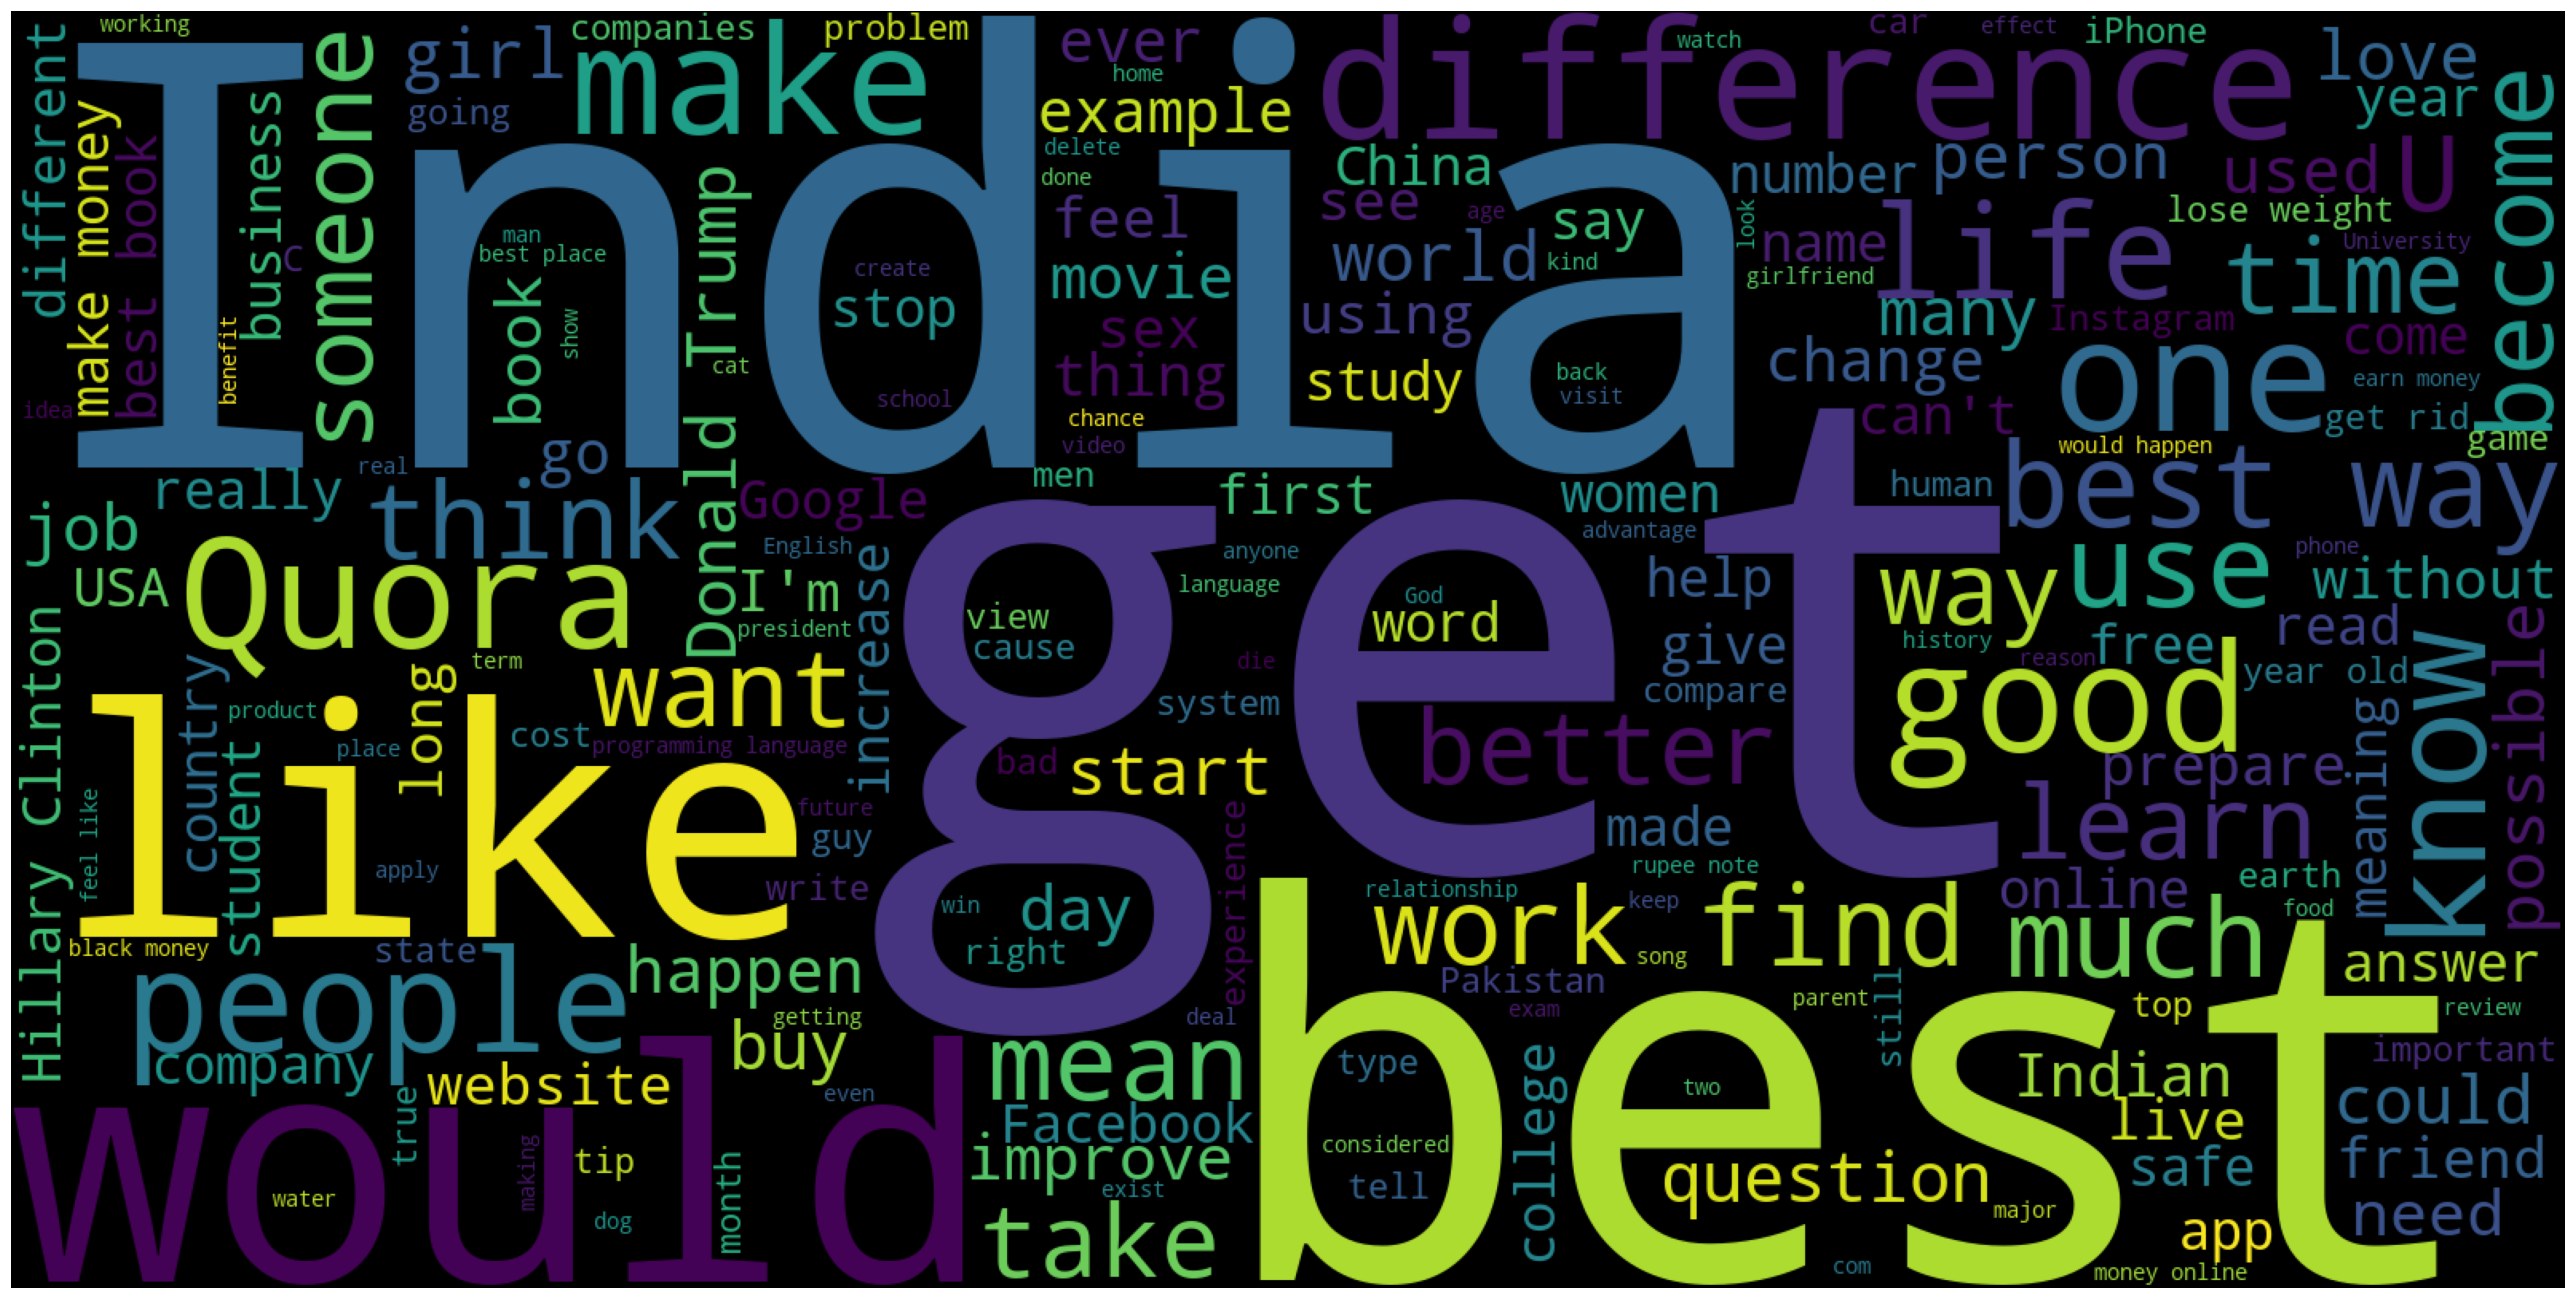

In [34]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_Q1)
plt.axis('off')
plt.show();

In [35]:
words = ' '.join(cloud_df['question2'])

print(words[:100])

How stressful is work of SBI clerk? Will a US graduate degree help a non-US citizen to get job in Ca


In [36]:
wordcloud_Q2 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

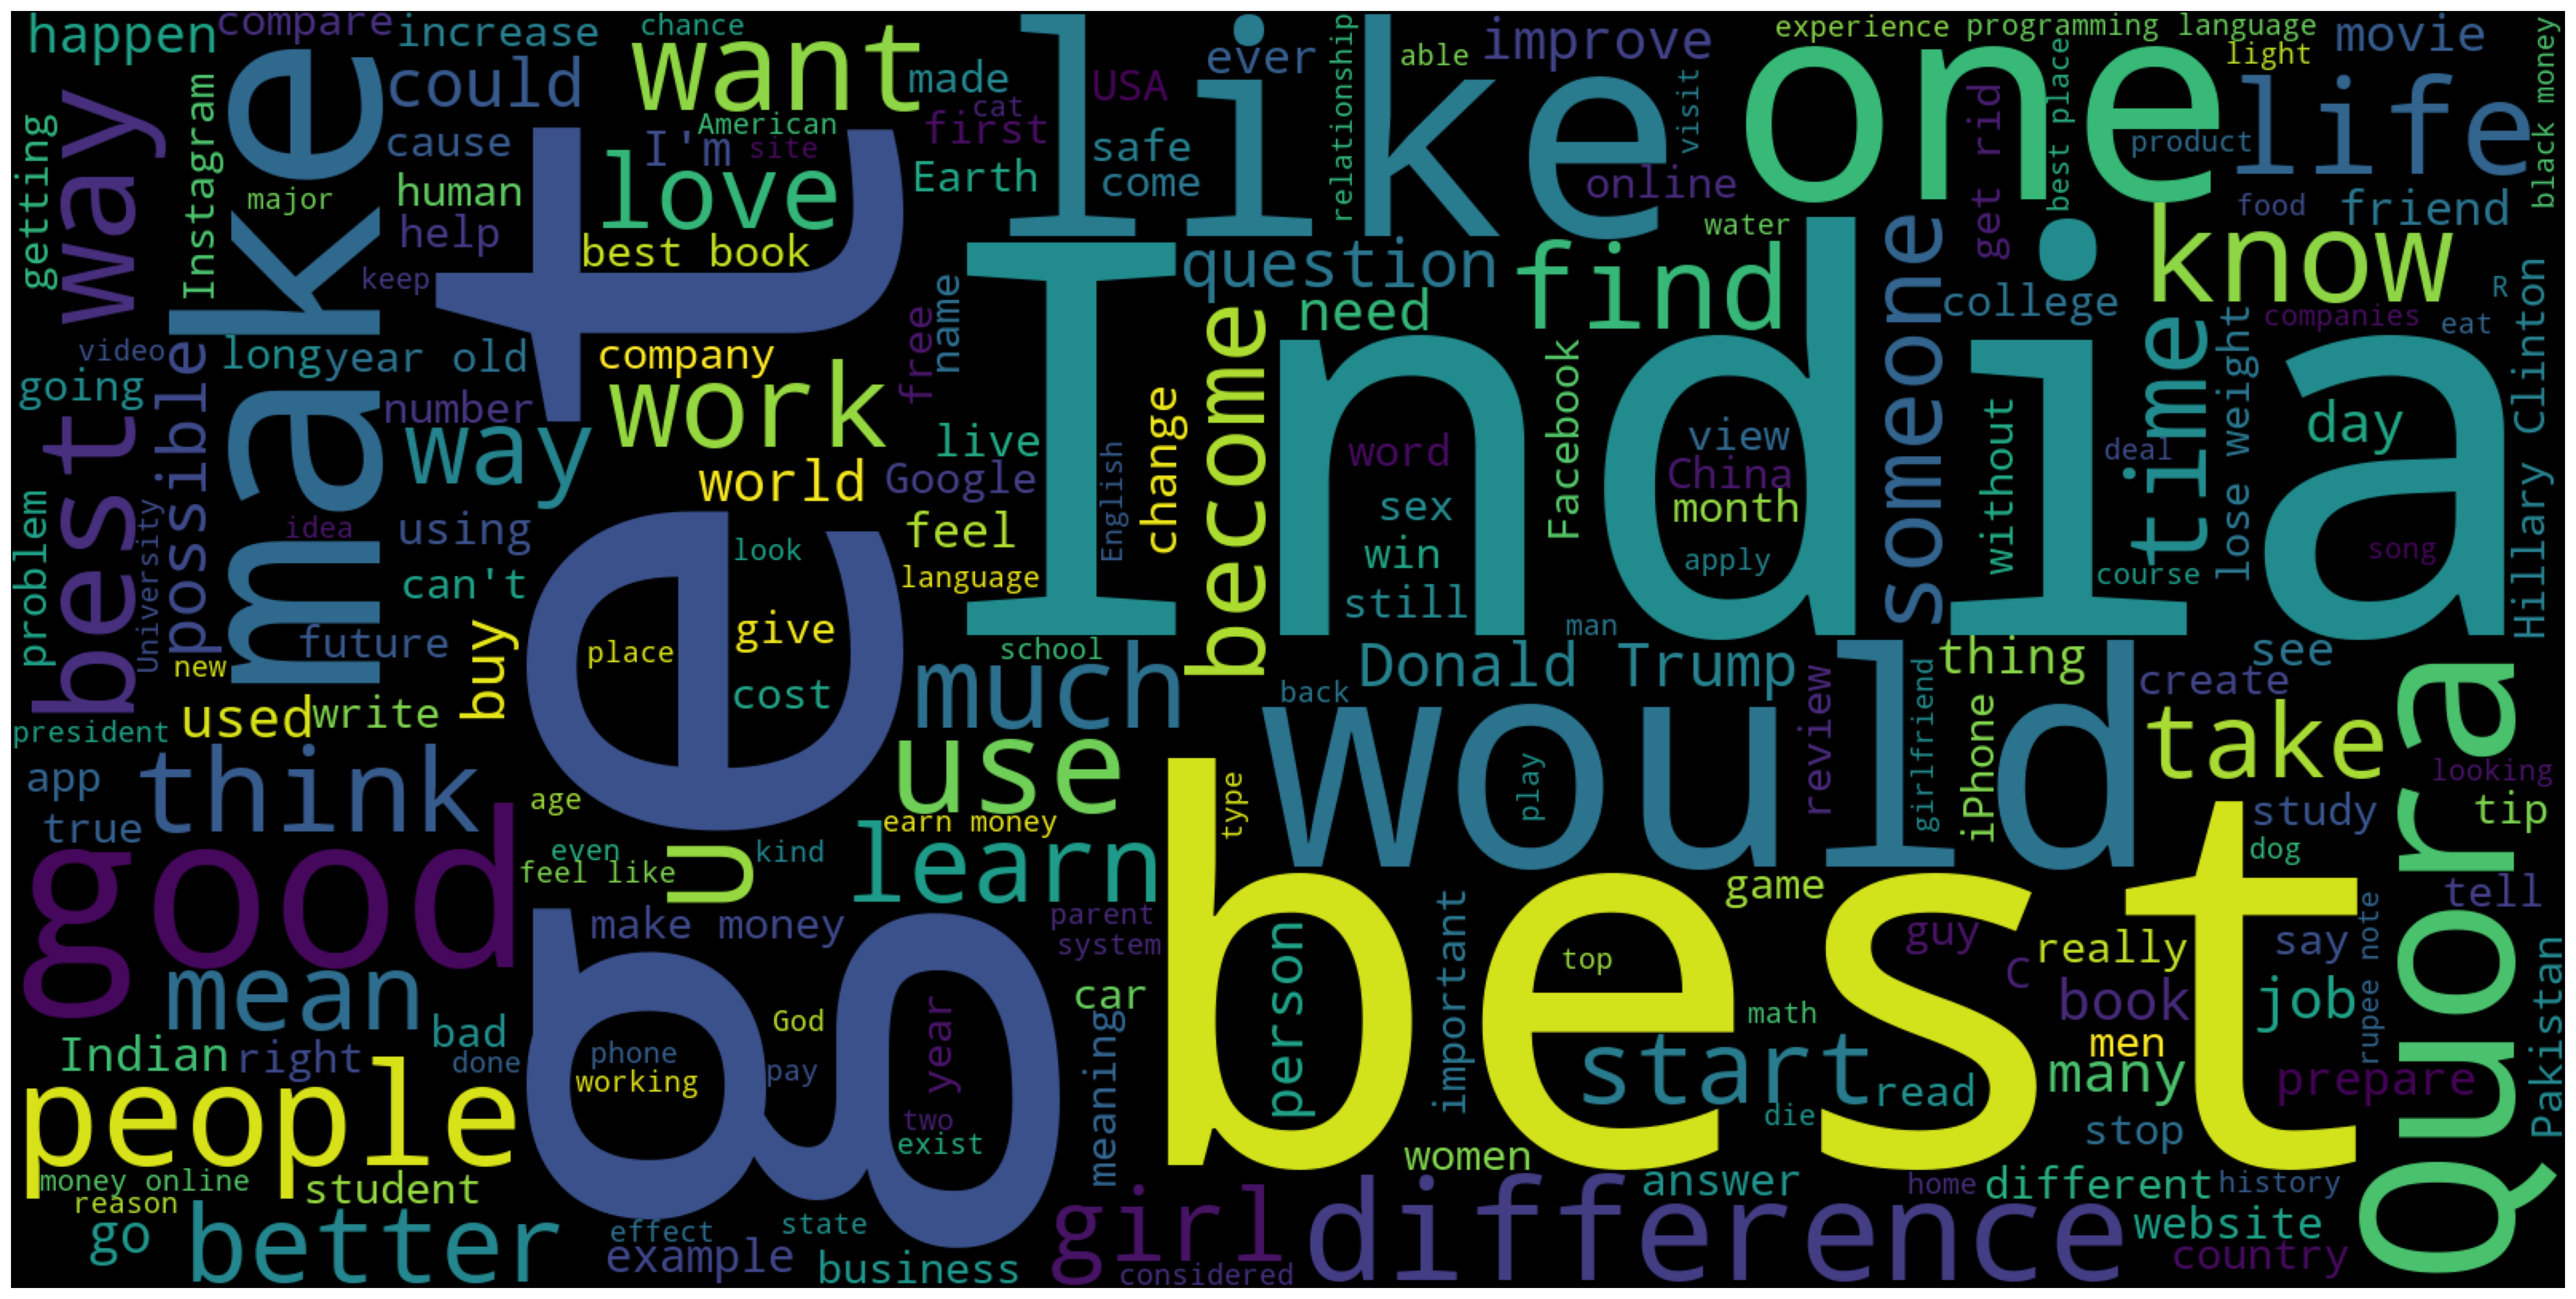

In [37]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_Q2)
plt.axis('off')
plt.show();

## Observations:
* If you can observe in the wordcloud displayed has some of the words larger than the other.That is because the size of the word in the word cloud is directly proportional to the frequency of the word inside the corpus.
* In Question1 & Questions2 Words Like --- `India,best,get,would,like,quora,etc.` are some of the important words.

# Application of BOW - Bag of words on top of Lemmatization

## Applying Lemmatization on Train Data

In [54]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [55]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [56]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
'''tqdm.pandas() is a method provided by tqdm library  that allows you to create/apply progress bars to pandas operations.
Works for pandas series as well as DataFrame, 
you can visualize the progress of your operations and get an estimate amount of time to complete the pandas task'''

'tqdm.pandas() is a method provided by tqdm library  that allows you to create/apply progress bars to pandas operations.\nWorks for pandas series as well as DataFrame, \nyou can visualize the progress of your operations and get an estimate amount of time to complete the pandas task'

In [41]:
temp_df = X_train['question1'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████| 283003/283003 [13:44<00:00, 343.33it/s]


0   1
20128                 working environment sbi life mumbai   5
296237                              u citizen work canada   4
107095                          benefit washing hand soap   4
27940     holy scripture hinduism compare contrast taoism   6
251434  humanoid shape inevitable specie similar intel...  10

In [42]:
temp_df1 = X_train['question2'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df1.head()

100%|█████████████████████████████████████████████████████████████████████████| 283003/283003 [13:06<00:00, 359.73it/s]


0   1
20128                            stressful work sbi clerk   4
296237  u graduate degree help non u citizen get job c...  14
107095                           important wash hand soap   4
27940   holy scripture hinduism compare contrast italo...   8
251434  rna evolves inevitable eventually intelligent ...  14

In [43]:
train_Lemma = pd.concat([temp_df,temp_df1], axis = 1)

In [44]:
train_Lemma.columns = ['Text_Lemma_Q1','Text_len_Q2','Text_Lemma_Q2','Text_len_Q2']

In [50]:
train_Lemma.head()

Text_Lemma_Q1  Text_len_Q2  \
20128                 working environment sbi life mumbai            5   
296237                              u citizen work canada            4   
107095                          benefit washing hand soap            4   
27940     holy scripture hinduism compare contrast taoism            6   
251434  humanoid shape inevitable specie similar intel...           10   

                                            Text_Lemma_Q2  Text_len_Q2  
20128                            stressful work sbi clerk            4  
296237  u graduate degree help non u citizen get job c...           14  
107095                           important wash hand soap            4  
27940   holy scripture hinduism compare contrast italo...            8  
251434  rna evolves inevitable eventually intelligent ...           14

In [52]:
train_Lemma.isna().sum()

Text_Lemma_Q1    0
Text_len_Q2      0
Text_Lemma_Q2    0
Text_len_Q2      0
dtype: int64

In [47]:
train_Lemma[train_Lemma.Text_Lemma_Q1 == '']

Text_Lemma_Q1  Text_len_Q2  \
215415                          0   
360644                          0   
296089                          0   
144890                          0   
185405                          0   
...              ...          ...   
216877                          0   
329933                          0   
297572                          0   
392095                          0   
376188                          0   

                                            Text_Lemma_Q2  Text_len_Q2  
215415  possible broader chest shoulder skeleton frame...           13  
360644                                   ever asked exist            3  
296089  good company study digital social medium marke...            7  
144890  pro con olympic lifting powerlifting athlete t...            8  
185405         get hurt football new england patriot game            7  
...                                                   ...          ...  
216877                  answer zero divided zero infinity            5  
329933                better moral example muhammad jesus            5  
297572                                                               0  
392095                                              equal            1  
376188                                            feeling            1  

[122 rows x 4 columns]

## Observations:
* After applying the lemmatization feature extraction some of the questions which are of no important i.e. stop words will be removed and we will get a value of zero. So when we load the data using pandas we will get null values.

In [53]:
train_Lemma.to_csv('Lemma_pre_df.csv',index=False)

## Applying Lemmatization on Test Data

In [57]:
temp_df2 = X_test['question1'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df2.head()

100%|█████████████████████████████████████████████████████████████████████████| 121287/121287 [05:13<00:00, 386.91it/s]


0  1
8067                                play pok mon go korea  5
368101                           best side dish crab cake  5
70497   advisable better material crash test automobil...  8
226567                  improve logical programming skill  4
73186                              close see rd world war  5

In [58]:
temp_df3 = X_test['question2'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df3.head()

100%|█████████████████████████████████████████████████████████████████████████| 121287/121287 [05:28<00:00, 369.77it/s]


0  1
8067                play pok mon go china  5
368101     good side dish buffalo chicken  5
70497        best server setup buddypress  4
226567  improve logical skill programming  4
73186                 close world war iii  4

In [84]:
test_Lemma = pd.concat([temp_df2,temp_df3], axis = 1)

In [85]:
test_Lemma.columns = ['Text_Lemma_Q1','Text_len_Q2','Text_Lemma_Q2','Text_len_Q2']

In [86]:
test_Lemma

Text_Lemma_Q1  Text_len_Q2  \
8067                                play pok mon go korea            5   
368101                           best side dish crab cake            5   
70497   advisable better material crash test automobil...            8   
226567                  improve logical programming skill            4   
73186                              close see rd world war            5   
...                                                   ...          ...   
35923       interesting app program mobile phone computer            6   
307141                                  amphiboly example            2   
295384                           improve english speaking            3   
320598                       metal extracted electrolysis            3   
197847                                           make day            2   

                                        Text_Lemma_Q2  Text_len_Q2  
8067                            play pok mon go china            5  
368101                 good side dish buffalo chicken            5  
70497                    best server setup buddypress            4  
226567              improve logical skill programming            4  
73186                             close world war iii            4  
...                                               ...          ...  
35923   interesting app program mobile phone computer            6  
307141                              amphiboly example            2  
295384                       continue improve english            3  
320598                   metal extracted electrolysis            3  
197847                                       make day            2  

[121287 rows x 4 columns]

In [87]:
test_Lemma.isna().sum()

Text_Lemma_Q1    0
Text_len_Q2      0
Text_Lemma_Q2    0
Text_len_Q2      0
dtype: int64

In [88]:
test_Lemma[test_Lemma.Text_Lemma_Q1 == ''].head(10)

Text_Lemma_Q1  Text_len_Q2  \
198913                          0   
230050                          0   
302123                          0   
246126                          0   
301583                          0   
230743                          0   
190570                          0   
7368                            0   
52880                           0   
106766                          0   

                                            Text_Lemma_Q2  Text_len_Q2  
198913                                                               0  
230050                                                               0  
302123                                                               0  
246126                                                               0  
301583                                                guy            1  
230743  good safe place near st louis mo easy public t...           11  
190570                        time money one explain work            5  
7368                                                                 0  
52880                                                                0  
106766                                        next number            2

In [89]:
test_Lemma.shape

(121287, 4)

## Observations:
* After applying the lemmatization feature extraction some of the questions which are of no important i.e. stop words will be removed and we will get a value of zero. So when we load the data using pandas we will get null values.

In [90]:
test_Lemma.to_csv('Lemma_pre_df1.csv',index=False)

## Handling Null values on train data

In [154]:
Lemma_train = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\Internship_Project\Lemma_pre_df.csv")

In [155]:
Lemma_train.head()

Text_Lemma_Q1  Text_len_Q2  \
0                working environment sbi life mumbai            5   
1                              u citizen work canada            4   
2                          benefit washing hand soap            4   
3    holy scripture hinduism compare contrast taoism            6   
4  humanoid shape inevitable specie similar intel...           10   

                                       Text_Lemma_Q2  Text_len_Q2.1  
0                           stressful work sbi clerk              4  
1  u graduate degree help non u citizen get job c...             14  
2                           important wash hand soap              4  
3  holy scripture hinduism compare contrast italo...              8  
4  rna evolves inevitable eventually intelligent ...             14

In [156]:
Lemma_train.isna().sum()

Text_Lemma_Q1    122
Text_len_Q2        0
Text_Lemma_Q2    122
Text_len_Q2.1      0
dtype: int64

In [157]:
Lemma_train[(Lemma_train.Text_Lemma_Q1.isna()) | (Lemma_train.Text_Lemma_Q2.isna())] 

Text_Lemma_Q1  Text_len_Q2  \
294                                                 value            1   
665                                                g mean            2   
1207                                                  NaN            0   
2210                                                  NaN            0   
4122                                                  NaN            0   
...                                                   ...          ...   
276686                                                NaN            0   
279202                                                NaN            0   
279745                                                NaN            0   
280727                                                NaN            0   
282439  negative number multiplied negative number pos...            7   

                                            Text_Lemma_Q2  Text_len_Q2.1  
294                                                   NaN              0  
665                                                   NaN              0  
1207    possible broader chest shoulder skeleton frame...             13  
2210                                     ever asked exist              3  
4122    good company study digital social medium marke...              7  
...                                                   ...            ...  
276686                better moral example muhammad jesus              5  
279202                                                NaN              0  
279745                                              equal              1  
280727                                            feeling              1  
282439                                                NaN              0  

[192 rows x 4 columns]

In [158]:
drop = Lemma_train[(Lemma_train.Text_Lemma_Q1.isna()) | (Lemma_train.Text_Lemma_Q2.isna())].index.to_list()

In [159]:
Lemma_train.drop(drop,axis = 0,inplace = True)

In [160]:
Lemma_train.reset_index(inplace = True,drop = 'first' )

In [161]:
Lemma_train.shape

(282811, 4)

In [162]:
y_train = pd.DataFrame(data = y_train) # Conver y_train to dataframe

In [163]:
y_train.reset_index(inplace = True, drop = 'first')

In [164]:
y_train

is_duplicate
0                  0
1                  0
2                  1
3                  0
4                  0
...              ...
282998             0
282999             1
283000             1
283001             0
283002             1

[283003 rows x 1 columns]

In [165]:
y_train.drop(drop,axis = 0,inplace = True) # Drop the labels of the null value indexes of BOW_train

In [166]:
y_train.reset_index(inplace = True,drop = 'first' )

### DataFrame.squeeze() 

> You can then use DataFrame.squeeze() to convert the DataFrame with a single column into a Series:

In [167]:
y_train = y_train.squeeze()

In [168]:
y_train

0         0
1         0
2         1
3         0
4         0
         ..
282806    0
282807    1
282808    1
282809    0
282810    1
Name: is_duplicate, Length: 282811, dtype: int64

In [169]:
Lemma_train.to_csv('lemma_final_train.csv')

## Handling Null values on Test

In [171]:
Lemma_test = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\Internship_Project\Lemma_pre_df1.csv")

In [172]:
Lemma_test.head()

Text_Lemma_Q1  Text_len_Q2  \
0                              play pok mon go korea            5   
1                           best side dish crab cake            5   
2  advisable better material crash test automobil...            8   
3                  improve logical programming skill            4   
4                             close see rd world war            5   

                       Text_Lemma_Q2  Text_len_Q2.1  
0              play pok mon go china              5  
1     good side dish buffalo chicken              5  
2       best server setup buddypress              4  
3  improve logical skill programming              4  
4                close world war iii              4

In [173]:
drop1 = Lemma_test[(Lemma_test.Text_Lemma_Q1.isna())].index.to_list()

In [174]:
Lemma_test.drop(drop1,axis = 0,inplace = True)

In [175]:
Lemma_test.reset_index(inplace = True,drop = 'first' )

In [176]:
Lemma_test.isna().sum()

Text_Lemma_Q1     0
Text_len_Q2       0
Text_Lemma_Q2    31
Text_len_Q2.1     0
dtype: int64

In [177]:
Lemma_test.isna().sum()

Text_Lemma_Q1     0
Text_len_Q2       0
Text_Lemma_Q2    31
Text_len_Q2.1     0
dtype: int64

In [178]:
y_test = pd.DataFrame(data = y_test)

In [179]:
y_test.reset_index(inplace = True, drop = 'first')

In [180]:
y_test.drop(drop1,axis = 0,inplace = True) # Drop the labels of the null value indexes of BOW_train

In [181]:
y_test.reset_index(inplace = True,drop = 'first' )

In [182]:
y_test

is_duplicate
0                  0
1                  0
2                  0
3                  1
4                  1
...              ...
121227             0
121228             1
121229             1
121230             1
121231             0

[121232 rows x 1 columns]

In [183]:
drop2=Lemma_test[(Lemma_test.Text_Lemma_Q2.isna())].index.to_list()

In [184]:
Lemma_test.drop(drop2,axis = 0,inplace = True)

In [185]:
Lemma_test.reset_index(inplace = True,drop = 'first' )

In [186]:
Lemma_test.isna().sum()

Text_Lemma_Q1    0
Text_len_Q2      0
Text_Lemma_Q2    0
Text_len_Q2.1    0
dtype: int64

In [187]:
Lemma_test.shape

(121201, 4)

In [188]:
y_test.drop(drop2,axis = 0,inplace = True) # Drop the labels of the null value indexes of BOW_train

In [189]:
y_test.reset_index(inplace = True,drop = 'first' )

In [190]:
y_test

is_duplicate
0                  0
1                  0
2                  0
3                  1
4                  1
...              ...
121196             0
121197             1
121198             1
121199             1
121200             0

[121201 rows x 1 columns]

In [191]:
y_test = y_test.squeeze()

In [192]:
y_test

0         0
1         0
2         0
3         1
4         1
         ..
121196    0
121197    1
121198    1
121199    1
121200    0
Name: is_duplicate, Length: 121201, dtype: int64

In [193]:
Lemma_test.to_csv('lemma_final_test.csv')

## Importing CountVectorizer 

### Applying BOW on Train data

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()


In [197]:
X_train_bow = vocab.fit_transform(Lemma_train['Text_Lemma_Q1']+Lemma_train['Text_Lemma_Q2'])

In [198]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 224293
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (282811, 224293)


In [199]:
X_train_bow

<282811x224293 sparse matrix of type '<class 'numpy.int64'>'
	with 2231750 stored elements in Compressed Sparse Row format>

### Applying BOW on Test data

In [200]:
X_test_bow = vocab.transform(Lemma_test['Text_Lemma_Q1']+Lemma_test['Text_Lemma_Q2'])

In [201]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_test_bow.shape)

Total unique words: 224293
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (121201, 224293)


In [202]:
X_test_bow

<121201x224293 sparse matrix of type '<class 'numpy.int64'>'
	with 887000 stored elements in Compressed Sparse Row format>

### Serializing the sparse matrix's of bow representation

In [204]:
#dump(X_test_bow, open('D:\Deep_learning\internship project\BOW\'s\BOW-objects\X_test_bow.pkl', 'wb'))
#dump(X_train_bow, open('D:\Deep_learning\internship project\BOW\'s\BOW-objects\X_train_bow.pkl', 'wb'))

In [205]:
#dump(y_train, open(r"D:\Deep_learning\internship project\BOW's\BOW-objects\y_train1.pkl", 'wb'))
#dump(y_test, open(r"D:\Deep_learning\internship project\BOW's\BOW-objects\y_test1.pkl", 'wb'))

### De - Serializing the sparse matrix's of bow representation

In [206]:
# Loading pretrained classifiers from pickle file

X_train_bow = load(open("D:\Deep_learning\internship project\BOW\'s\BOW-objects\X_train_bow.pkl", 'rb'))
X_test_bow = load(open("D:\Deep_learning\internship project\BOW\'s\BOW-objects\X_test_bow.pkl", 'rb'))
y_train = load(open(r"D:\Deep_learning\internship project\BOW's\BOW-objects\y_train1.pkl", 'rb'))
y_test = load(open(r"D:\Deep_learning\internship project\BOW's\BOW-objects\y_test1.pkl", 'rb'))

In [208]:
X_train_bow
X_test_bow
y_train
y_test

<282811x224293 sparse matrix of type '<class 'numpy.int64'>'
	with 2231750 stored elements in Compressed Sparse Row format>

<121201x224293 sparse matrix of type '<class 'numpy.int64'>'
	with 887000 stored elements in Compressed Sparse Row format>

0         0
1         0
2         1
3         0
4         0
         ..
282806    0
282807    1
282808    1
282809    0
282810    1
Name: is_duplicate, Length: 282811, dtype: int64

0         0
1         0
2         0
3         1
4         1
         ..
121196    0
121197    1
121198    1
121199    1
121200    0
Name: is_duplicate, Length: 121201, dtype: int64